# Analyse Stock Price Data of a selected Timeframe

## Install TA-Lib

In [30]:
# conda install -c conda-forge ta-lib

In [31]:
# !pip install yfinance
# !pip install TA-Lib
# !pip install fredapi
# !pip install yahooquery
# !pip install yahoo_fin

In [32]:
import numpy as np
import pandas as pd
import yfinance as yf
import yahooquery as yq
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import talib
from fredapi import Fred
import warnings
warnings.filterwarnings('ignore')

In [33]:
start_date = dt.datetime(2013, 3, 1).date()
end_date = dt.datetime(2023, 3, 1).date()
ticker = 'AMD'
data = yf.download(ticker, start_date, end_date)
data.index = data.index.date
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2013-03-01,2.50,2.51,2.42,2.42,2.42,19689400
2013-03-04,2.44,2.45,2.36,2.40,2.40,14570000
2013-03-05,2.45,2.47,2.40,2.43,2.43,13958900
2013-03-06,2.45,2.46,2.40,2.43,2.43,10834600
2013-03-07,2.44,2.57,2.43,2.55,2.55,21089800
...,...,...,...,...,...,...
2023-02-22,76.93,78.13,75.92,76.61,76.61,50286800
2023-02-23,80.63,81.79,77.97,79.75,79.75,76391300
2023-02-24,77.75,78.81,76.94,78.09,78.09,46700000
2023-02-27,79.64,80.12,78.53,78.77,78.77,45617300


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2517 entries, 2013-03-01 to 2023-02-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2517 non-null   float64
 1   High       2517 non-null   float64
 2   Low        2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Adj Close  2517 non-null   float64
 5   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6+ KB


In [35]:
data.describe().applymap("{0:.5f}".format).T

,count,mean,std,min,25%,50%,75%,max
Open,2517.00000,34.34747,38.36990,1.62000,3.88000,13.55000,63.15000,163.28000
High,2517.00000,35.05819,39.16422,1.69000,3.97000,13.84000,64.28000,164.46001
Low,2517.00000,33.59864,37.50324,1.61000,3.83000,13.27000,61.96000,156.10001
Close,2517.00000,34.33845,38.34146,1.62000,3.88000,13.55000,63.08000,161.91000
Adj Close,2517.00000,34.33845,38.34146,1.62000,3.88000,13.55000,63.08000,161.91000
Volume,2517.00000,51878710.25030,38239629.56969,0.00000,22592300.00000,44345400.00000,70536100.00000,325058400.00000


#### Add simple moving average of 30 days and exponential moving average of smoothing constant at $\alpha$ = 0.3

In [36]:
data['30MA'] = data['Close'].rolling(window=30).mean()
data['50MA'] = data['Close'].rolling(window=50).mean()
data['200MA'] = data['Close'].rolling(window=200).mean()
data['EMA_0.3'] = data['Close'].ewm(alpha=0.3, adjust=False).mean()
data.tail()

,Open,High,Low,Close,Adj Close,Volume,30MA,50MA,200MA,EMA_0.3
2023-02-22,76.93,78.13,75.92,76.61,76.61,50286800,77.58,72.85,78.85,79.13
2023-02-23,80.63,81.79,77.97,79.75,79.75,76391300,77.97,73.07,78.78,79.31
2023-02-24,77.75,78.81,76.94,78.09,78.09,46700000,78.27,73.22,78.73,78.95
2023-02-27,79.64,80.12,78.53,78.77,78.77,45617300,78.53,73.36,78.68,78.89
2023-02-28,77.87,80.14,77.42,78.58,78.58,44220100,78.79,73.56,78.64,78.80


In [37]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# data = pd.read_csv("TSLA.csv", parse_dates=True)

# Create subplots and mention plot grid size
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.03, row_width=[1.7, 1.7])

# Plot OHLC on 1st row
fig.add_trace(go.Candlestick(x=data.index, open=data["Open"], high=data["High"],
                low=data["Low"], close=data["Close"], name="OHLC"), row=1, col=1)

# Plot volume on 2nd row
fig.add_trace(go.Bar(x=data.index, y=data['Volume'], name="volume"), row=2, col=1)

fig.add_trace(go.Scatter(x=data.index,
                y=data["30MA"],
                name="30MA",
                opacity=0.7,
                line=dict(color='orange', width=2),
                ))

fig.add_trace(go.Scatter(x=data.index,
                y=data["50MA"],
                name="50MA",
                opacity=0.7,
                line=dict(color='green', width=2),
                ))

fig.add_trace(go.Scatter(x=data.index,
                y=data["200MA"],
                name="200MA",
                opacity=0.7,
                line=dict(color='red', width=2),
                ))

fig.add_trace(go.Scatter(x=data.index,
                y=data["EMA_0.3"],
                name="EMA_0.3",
                opacity=0.7,
                line=dict(color='blue', width=2),
                ))

# Show OHLC's rangeslider plot 
fig.update(layout_xaxis_rangeslider_visible=True)
fig.show()

#### We can see that the daily returns are random and normally distributed as shown by the 2 graphs below.

<AxesSubplot:>

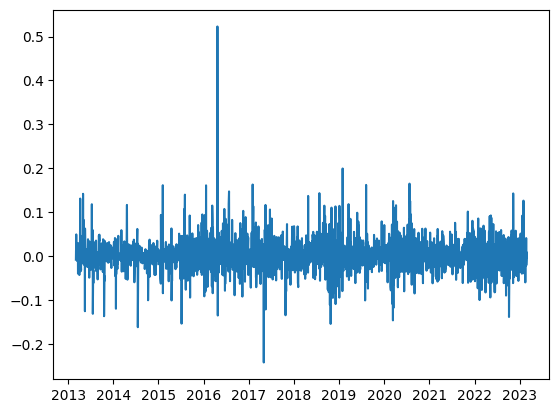

In [38]:
daily_returns = data.Close.pct_change()
daily_returns.plot()

Text(0, 0.5, 'Counts')

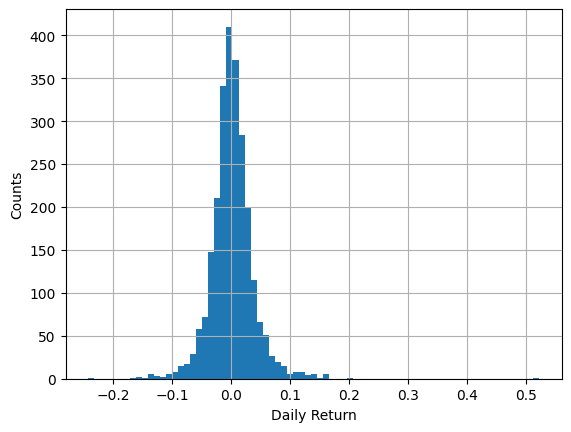

In [39]:

daily_returns.hist(bins=75)
plt.xlabel('Daily Return')
plt.ylabel('Counts')

#### Analysis of Close Price based on Year, Quarter, Month & Week

In [40]:
data.index = pd.to_datetime(data.index)
monthly_mean = data['Close'].resample('M').mean()
monthly_data = monthly_mean.to_frame()
monthly_data.head(10)

,Close
2013-03-31,2.56
2013-04-30,2.51
2013-05-31,3.91
2013-06-30,4.01
2013-07-31,4.04
2013-08-31,3.63
2013-09-30,3.75
2013-10-31,3.64
2013-11-30,3.41
2013-12-31,3.70


In [41]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data.head(10)

,Close,Year,Month,dayofweek,quarter
2013-03-31,2.56,2013,March,Sunday,1
2013-04-30,2.51,2013,April,Tuesday,2
2013-05-31,3.91,2013,May,Friday,2
2013-06-30,4.01,2013,June,Sunday,2
2013-07-31,4.04,2013,July,Wednesday,3
2013-08-31,3.63,2013,August,Saturday,3
2013-09-30,3.75,2013,September,Monday,3
2013-10-31,3.64,2013,October,Thursday,4
2013-11-30,3.41,2013,November,Saturday,4
2013-12-31,3.70,2013,December,Tuesday,4


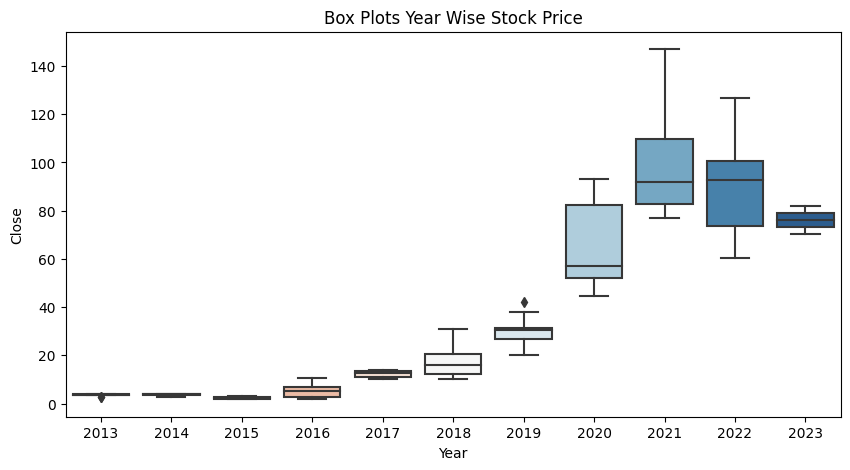

In [42]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x=monthly_data['Year'],y=monthly_data['Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise Stock Price')
plt.style.context('fivethirtyeight')

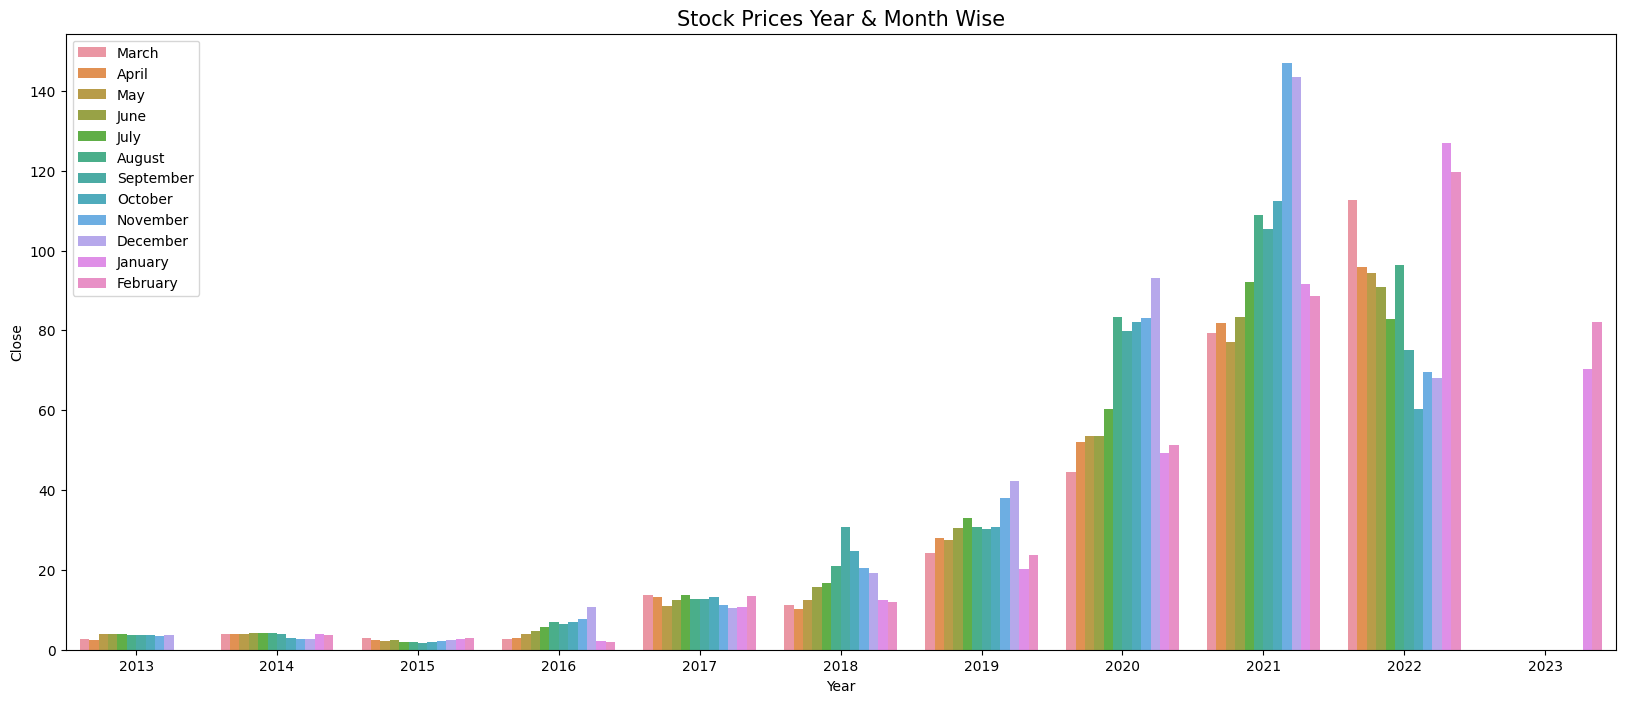

In [43]:
fig, ax = plt.subplots(figsize=(20,8))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Close",hue = 'Month',data=monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

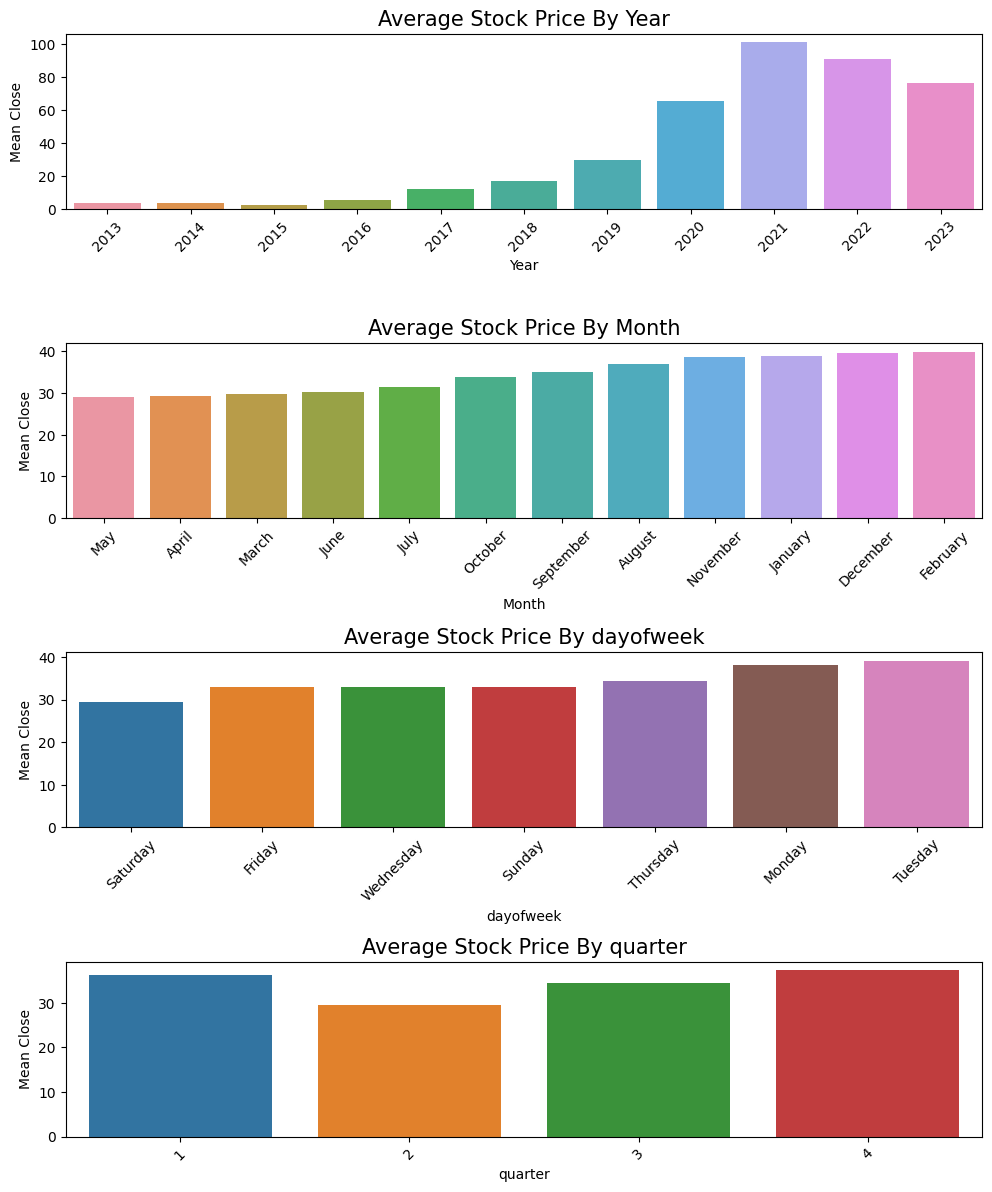

In [44]:
fig = plt.figure(figsize=(10,8))
fig.set_size_inches(10,12)
group_cols = monthly_data.columns

for enum,i in enumerate(group_cols[1:]):
  ax = fig.add_subplot(4,1,enum+1)
  Aggregated = pd.DataFrame(monthly_data.groupby(str(i))["Close"].mean()).reset_index().sort_values('Close')
  sns.barplot(data=Aggregated,x=str(i),y="Close",ax=ax)
  ax.set(xlabel=str(i), ylabel='Mean Close')
  ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
  plt.xticks(rotation=45)
  
plt.tight_layout(pad=1)

## We will only use certain indicators from the original dataset

In [45]:
stockCloseVolume = data.drop(columns=["Open", "High", "Low", "Adj Close", "200MA"]).copy()
stockCloseVolume

,Close,Volume,30MA,50MA,EMA_0.3
2013-03-01,2.42,19689400,NaN,NaN,2.42
2013-03-04,2.40,14570000,NaN,NaN,2.41
2013-03-05,2.43,13958900,NaN,NaN,2.42
2013-03-06,2.43,10834600,NaN,NaN,2.42
2013-03-07,2.55,21089800,NaN,NaN,2.46
...,...,...,...,...,...
2023-02-22,76.61,50286800,77.58,72.85,79.13
2023-02-23,79.75,76391300,77.97,73.07,79.31
2023-02-24,78.09,46700000,78.27,73.22,78.95
2023-02-27,78.77,45617300,78.53,73.36,78.89


### Retrieve from FRED Database (US Economics and market data)

In [46]:
# Replace YOUR_API_KEY with your FRED API key
fred = Fred(api_key='47bd175ac2732acae3621b3c48848ff4')

# Retrieve daily close price of stock market indexes

sp500 = fred.get_series('SP500', observation_start = start_date, 
                        observation_end = end_date)

#Dow Jones Composite Average
djca = fred.get_series('DJCA', observation_start = start_date, 
                       observation_end = end_date) 

treasury_10y = fred.get_series('DGS10', observation_start = start_date, 
                               observation_end = end_date)

marketData = pd.DataFrame({'S&P500': sp500, 'DowJones': djca,
                        '10Y_Treasury_Rate': treasury_10y})

marketData = marketData.dropna()

marketData

,S&P500,DowJones,10Y_Treasury_Rate
2013-03-28,1569.19,5036.94,1.87
2013-04-01,1562.17,5011.37,1.86
2013-04-02,1570.25,5011.22,1.88
2013-04-03,1553.69,4968.36,1.83
2013-04-04,1559.98,4987.32,1.78
...,...,...,...
2023-02-23,4012.32,11180.26,3.88
2023-02-24,3970.04,11095.39,3.95
2023-02-27,3982.24,11141.21,3.92
2023-02-28,3970.15,11048.13,3.92


In [47]:
combined_data = pd.concat([stockCloseVolume, marketData], axis=1).ffill()
combined_data

,Close,Volume,30MA,50MA,EMA_0.3,S&P500,DowJones,10Y_Treasury_Rate
2013-03-01,2.42,19689400.00,NaN,NaN,2.42,NaN,NaN,NaN
2013-03-04,2.40,14570000.00,NaN,NaN,2.41,NaN,NaN,NaN
2013-03-05,2.43,13958900.00,NaN,NaN,2.42,NaN,NaN,NaN
2013-03-06,2.43,10834600.00,NaN,NaN,2.42,NaN,NaN,NaN
2013-03-07,2.55,21089800.00,NaN,NaN,2.46,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-02-23,79.75,76391300.00,77.97,73.07,79.31,4012.32,11180.26,3.88
2023-02-24,78.09,46700000.00,78.27,73.22,78.95,3970.04,11095.39,3.95
2023-02-27,78.77,45617300.00,78.53,73.36,78.89,3982.24,11141.21,3.92
2023-02-28,78.58,44220100.00,78.79,73.56,78.80,3970.15,11048.13,3.92


## TA-Lib Technical Indicators

In [48]:
# Compute the Relative Strength Index (RSI)
rsi = talib.RSI(data['Close'], timeperiod=14)

# Compute the Moving Average Convergence Divergence (MACD)
macd, macdsignal, macdhist = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Compute the Upper and Lower Bollinger Bands
upper, middle, lower = talib.BBANDS(data['Close'], timeperiod=20, nbdevup=2, nbdevdn=2)

# Compute Stochastic Oscillator
stochK, stochD = talib.STOCH(data['High'], data['Low'], data['Close'], 
                                  fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3)

# Compute Average Directional Index (ADX)
adx = talib.ADX(data['High'], data['Low'], data['Close'])

# Compute Chaikin Oscillator
chaikin = talib.ADOSC(data['High'], data['Low'], data['Close'], data['Volume'])

# Compute On-Balance Volume (OBV)
obv = talib.OBV(data['Close'], data['Volume'])

# Add the technical indicators to the DataFrame
combined_data['RSI'] = rsi
combined_data['MACD'] = macd
combined_data['MACD_Signal'] = macdsignal
combined_data['MACD_Histogram'] = macdhist
combined_data['Upper_Bollinger_Band'] = upper
combined_data['Middle_Bollinger_Band'] = middle
combined_data['Lower_Bollinger_Band'] = lower
combined_data['Stoch_K'] = stochK
combined_data['Stoch_D'] = stochD
combined_data['ADX'] = adx
combined_data['Chaikin_Osc'] = chaikin
combined_data['OBV'] = obv

combined_data

,Close,Volume,30MA,50MA,EMA_0.3,S&P500,DowJones,10Y_Treasury_Rate,RSI,MACD,MACD_Signal,MACD_Histogram,Upper_Bollinger_Band,Middle_Bollinger_Band,Lower_Bollinger_Band,Stoch_K,Stoch_D,ADX,Chaikin_Osc,OBV
2013-03-01,2.42,19689400.00,NaN,NaN,2.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19689400.00
2013-03-04,2.40,14570000.00,NaN,NaN,2.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5119400.00
2013-03-05,2.43,13958900.00,NaN,NaN,2.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19078300.00
2013-03-06,2.43,10834600.00,NaN,NaN,2.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19078300.00
2013-03-07,2.55,21089800.00,NaN,NaN,2.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40168100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-23,79.75,76391300.00,77.97,73.07,79.31,4012.32,11180.26,3.88,52.36,1.60,2.74,-1.14,90.13,81.11,72.08,20.58,11.26,22.65,-21072872.15,5121848300.00
2023-02-24,78.09,46700000.00,78.27,73.22,78.95,3970.04,11095.39,3.95,49.43,1.32,2.45,-1.14,89.98,81.25,72.53,31.81,20.02,21.62,-17690759.74,5075148300.00
2023-02-27,78.77,45617300.00,78.53,73.36,78.89,3982.24,11141.21,3.92,50.65,1.13,2.19,-1.06,89.81,81.42,73.03,45.69,32.70,20.99,-24831798.14,5120765600.00
2023-02-28,78.58,44220100.00,78.79,73.56,78.80,3970.15,11048.13,3.92,50.28,0.96,1.94,-0.98,89.18,81.73,74.27,43.61,40.37,20.04,-27564785.66,5076545500.00


In [49]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-03-01 to 2023-03-01
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Close                  2518 non-null   float64
 1   Volume                 2518 non-null   float64
 2   30MA                   2489 non-null   float64
 3   50MA                   2469 non-null   float64
 4   EMA_0.3                2518 non-null   float64
 5   S&P500                 2499 non-null   float64
 6   DowJones               2499 non-null   float64
 7   10Y_Treasury_Rate      2499 non-null   float64
 8   RSI                    2503 non-null   float64
 9   MACD                   2484 non-null   float64
 10  MACD_Signal            2484 non-null   float64
 11  MACD_Histogram         2484 non-null   float64
 12  Upper_Bollinger_Band   2498 non-null   float64
 13  Middle_Bollinger_Band  2498 non-null   float64
 14  Lower_Bollinger_Band   2498 non-null  

### Remove the null values at the front of the dataset caused by the technical indicators

In [50]:
filtered_data = combined_data[49:-1]
filtered_data

,Close,Volume,30MA,50MA,EMA_0.3,S&P500,DowJones,10Y_Treasury_Rate,RSI,MACD,MACD_Signal,MACD_Histogram,Upper_Bollinger_Band,Middle_Bollinger_Band,Lower_Bollinger_Band,Stoch_K,Stoch_D,ADX,Chaikin_Osc,OBV
2013-05-10,3.95,30586600.00,2.81,2.71,3.72,1633.70,5171.51,1.90,84.84,0.35,0.23,0.12,4.09,2.98,1.87,88.76,85.41,38.43,36602927.95,514733100.00
2013-05-13,4.17,54889400.00,2.87,2.74,3.85,1633.77,5153.04,1.92,87.03,0.38,0.26,0.12,4.26,3.07,1.88,87.56,86.31,40.73,44530642.10,569622500.00
2013-05-14,4.26,53292800.00,2.93,2.78,3.98,1650.34,5209.41,1.96,87.80,0.41,0.29,0.12,4.42,3.16,1.90,93.09,89.80,43.00,46148007.20,622915300.00
2013-05-15,4.38,39347300.00,3.00,2.82,4.10,1658.78,5239.72,1.94,88.77,0.44,0.32,0.12,4.57,3.26,1.95,93.39,91.35,45.23,48874180.91,662262600.00
2013-05-16,3.83,80221500.00,3.05,2.85,4.02,1650.47,5211.34,1.87,63.85,0.41,0.34,0.07,4.61,3.33,2.04,69.65,85.38,43.65,51015947.77,582041100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22,76.61,50286800.00,77.58,72.85,79.13,3991.05,11134.50,3.93,46.82,1.78,3.02,-1.25,90.28,80.87,71.45,7.67,14.32,23.43,-16305349.27,5045457000.00
2023-02-23,79.75,76391300.00,77.97,73.07,79.31,4012.32,11180.26,3.88,52.36,1.60,2.74,-1.14,90.13,81.11,72.08,20.58,11.26,22.65,-21072872.15,5121848300.00
2023-02-24,78.09,46700000.00,78.27,73.22,78.95,3970.04,11095.39,3.95,49.43,1.32,2.45,-1.14,89.98,81.25,72.53,31.81,20.02,21.62,-17690759.74,5075148300.00
2023-02-27,78.77,45617300.00,78.53,73.36,78.89,3982.24,11141.21,3.92,50.65,1.13,2.19,-1.06,89.81,81.42,73.03,45.69,32.70,20.99,-24831798.14,5120765600.00


In [51]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2468 entries, 2013-05-10 to 2023-02-28
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Close                  2468 non-null   float64
 1   Volume                 2468 non-null   float64
 2   30MA                   2468 non-null   float64
 3   50MA                   2468 non-null   float64
 4   EMA_0.3                2468 non-null   float64
 5   S&P500                 2468 non-null   float64
 6   DowJones               2468 non-null   float64
 7   10Y_Treasury_Rate      2468 non-null   float64
 8   RSI                    2468 non-null   float64
 9   MACD                   2468 non-null   float64
 10  MACD_Signal            2468 non-null   float64
 11  MACD_Histogram         2468 non-null   float64
 12  Upper_Bollinger_Band   2468 non-null   float64
 13  Middle_Bollinger_Band  2468 non-null   float64
 14  Lower_Bollinger_Band   2468 non-null  

In [52]:
filtered_data.describe().applymap("{0:.5f}".format).T

,count,mean,std,min,25%,50%,75%,max
Close,2468.00000,34.96692,38.45734,1.62000,3.97000,13.88000,64.87750,161.91000
Volume,2468.00000,52462022.00162,38293420.23689,0.00000,23634800.00000,44738050.00000,71205450.00000,325058400.00000
30MA,2468.00000,34.51229,38.18448,1.78367,3.93308,13.44533,65.40775,147.24267
50MA,2468.00000,34.22618,38.03873,1.82280,3.83185,13.05400,65.97345,144.69900
EMA_0.3,2468.00000,34.89584,38.39347,1.70592,3.98095,13.75938,65.10425,156.85878
S&P500,2468.00000,2806.39084,863.93217,1573.09000,2076.26250,2657.71000,3381.09750,4796.56000
DowJones,2468.00000,8104.62135,2055.80968,4918.16000,6271.99500,8040.60000,9490.42750,12360.33000
10Y_Treasury_Rate,2468.00000,2.18636,0.72363,0.52000,1.72000,2.25500,2.69000,4.25000
RSI,2468.00000,52.74361,12.74963,9.24577,43.64382,52.38043,61.49547,88.76740
MACD,2468.00000,0.21289,1.87815,-9.13774,-0.13525,0.05576,0.55701,10.38179


<AxesSubplot:>

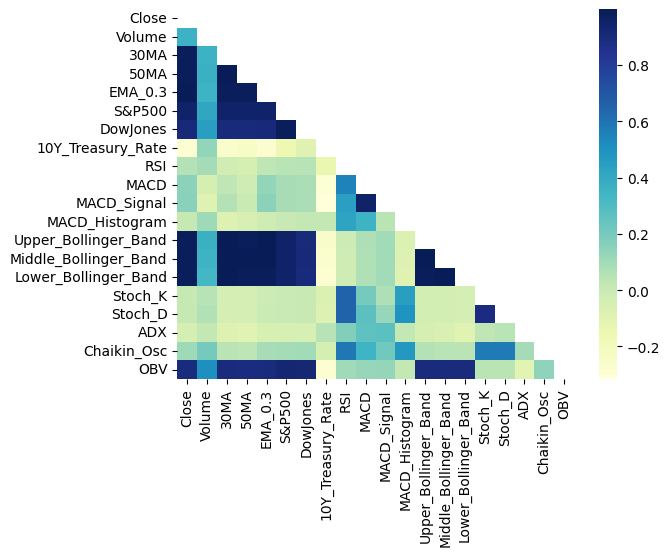

In [53]:
mask = np.triu(np.ones_like(filtered_data.corr()))
sns.heatmap(filtered_data.corr(), mask=mask, cmap="YlGnBu")

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# data['Date'] = pd.to_datetime(data['Date']).astype('int32')
scaler = StandardScaler()

# columns = ['Volume','30MA','50MA','EMA_0.3','S&P500','DowJones','10Y_Treasury_Rate','RSI', 'MACD', 'MACD_Signal','MACD_Histogram',
#            'Upper_Bollinger_Band','Middle_Bollinger_Band','Lower_Bollinger_Band',
#            'Stoch_K','Stoch_D','ADX','Chaikin_Osc','OBV']
# X = filtered_data[columns]
X = filtered_data.drop(columns=["Close"]).copy()
X = scaler.fit_transform(X)

y = pd.DataFrame(filtered_data['Close'])
# y = scaler.fit_transform(y)

print(X.shape)
print(y.shape)

(2468, 19)
(2468, 1)


### Dimensionality Reduction using Principal Component Analysis (PCA)

In [55]:
from sklearn.decomposition import PCA

n_components = len(filtered_data.columns)-1
pca = PCA(n_components = n_components).fit(X)

np.set_printoptions(suppress=True)
np.round(pca.explained_variance_ratio_, 2)

array([0.47, 0.2 , 0.1 , 0.06, 0.04, 0.03, 0.03, 0.02, 0.02, 0.01, 0.01,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

#### Especially with time series data, because the sequence of values is important, we do not distribute the dataset into training and test sets in random fashion. Instead, we select an arbitrary split point in the ordered list of observations.

#### Hence, shuffle = False for train_test_split is a very crucial step.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1727, 19)
(1727, 1)
(741, 19)
(741, 1)


In [57]:
def evaluate_model_rmse(model_type, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
    model = model_type
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_predict, squared=False)
    return rmse

evaluate_model_rmse(LinearRegression())

2.5521182173357015

#### Instead of a vanilla linear regression, a comprehensive alternative is to use the LazyRegressor library to demonstrate the efficiency of various ML algorithms with just a few lines of codes.

In [58]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

models

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [03:57<00:00,  5.65s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Ridge,0.99,0.99,1.86,0.03
RidgeCV,0.99,0.99,1.91,0.02
HuberRegressor,0.99,0.99,1.95,0.10
LinearSVR,0.99,0.99,1.98,0.11
PassiveAggressiveRegressor,0.99,0.99,2.11,0.02
OrthogonalMatchingPursuitCV,0.99,0.99,2.12,0.03
LassoCV,0.99,0.99,2.12,0.09
LassoLarsCV,0.99,0.99,2.26,0.06
BayesianRidge,0.99,0.99,2.43,0.02


# Regression & ensemble learning

In [59]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor

In [60]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNR', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('RFR', RandomForestRegressor()))
models.append(('BR', BaggingRegressor()))
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('ETR', ExtraTreesRegressor()))
models.append(('XGB', XGBRegressor()))
models.append(('LGBM', LGBMRegressor()))
models.append(('CBR', CatBoostRegressor(silent=True)))
models.append(('MLP', MLPRegressor()))

In [61]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

#### Instead of KFold, TimeSeriesSplit is used due to the sequential nature of the dataset.

In [62]:
model_names, TS_split_results, test_results, train_results = [], [], [], []
num_folds = 5
scoring = 'neg_mean_squared_error'
row_list=[]
# results = pd.DataFrame(columns=['Names','CV_mean','CV_std','Train_RMSE','Test_RMSE'])

print("Model | Mean | Std | Train Results | Test Results")

for name, model in models:
    model_names.append(name)
    TS_split = TimeSeriesSplit(n_splits=num_folds)

    #converted mean square error to positive before converting to RMSE
    cv_results = np.sqrt(-1 * cross_val_score(model, X_train, y_train, cv=TS_split, scoring=scoring))
    TS_split_results.append(cv_results)

    # Full Training period
    res = model.fit(X_train, y_train)
    train_result = mean_squared_error(y_train, res.predict(X_train), squared=False)
    train_results.append(train_result)

    # Test results
    test_result = mean_squared_error(y_test, res.predict(X_test), squared=False)
    test_results.append(test_result)

    dict1={'Names':name,'CV_mean':cv_results.mean(),'CV_std':cv_results.std(),'Train_RMSE':train_result,'Test_RMSE':test_result}
    row_list.append(dict1)
    # results.append({'names':[name],'CV_mean':[cv_results.mean()],'CV_std': [cv_results.std()],'train_RMSE': [train_result], 'test_RMSE':[test_result]},ignore_index=True)
    
    model_comparisons = "%s: %f %f %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(model_comparisons)

Model | Mean | Std | Train Results | Test Results
LR: 0.389169 0.208954 0.329900 2.552118
LASSO: 8.136174 6.267877 3.264519 55.067998
RIDGE: 1.168980 0.362768 0.377865 2.333823
EN: 8.813000 7.620205 4.437037 47.299411
KNR: 7.355006 6.341006 0.844658 48.358880
CART: 4.963092 3.773339 0.000000 39.748504
SVR: 6.716336 5.546285 2.049008 70.615787
RFR: 4.871261 3.715861 0.144800 40.778184
BR: 4.911405 3.778541 0.163160 41.177147
ABR: 4.938873 3.799953 0.980291 40.163333
GBR: 4.661554 3.422864 0.173820 40.505489
ETR: 4.818272 3.540466 0.000000 41.300890
XGB: 4.873938 3.670298 0.018663 41.216865
LGBM: 4.720306 3.450581 0.174310 42.592248
CBR: 5.413314 4.025156 0.074247 47.346837
MLP: 6.531658 6.157149 0.995346 32.245546


In [63]:
results = pd.DataFrame(row_list)
results = results.set_index('Names')
results.round(4)
results

,CV_mean,CV_std,Train_RMSE,Test_RMSE
Names,,,,
LR,0.39,0.21,0.33,2.55
LASSO,8.14,6.27,3.26,55.07
RIDGE,1.17,0.36,0.38,2.33
EN,8.81,7.62,4.44,47.30
KNR,7.36,6.34,0.84,48.36
CART,4.96,3.77,0.00,39.75
SVR,6.72,5.55,2.05,70.62
RFR,4.87,3.72,0.14,40.78
BR,4.91,3.78,0.16,41.18


#### Ensemble learning methods generally outperform regression techniques, with multi-layer preceptron performing the worst when evaluating RMSE.

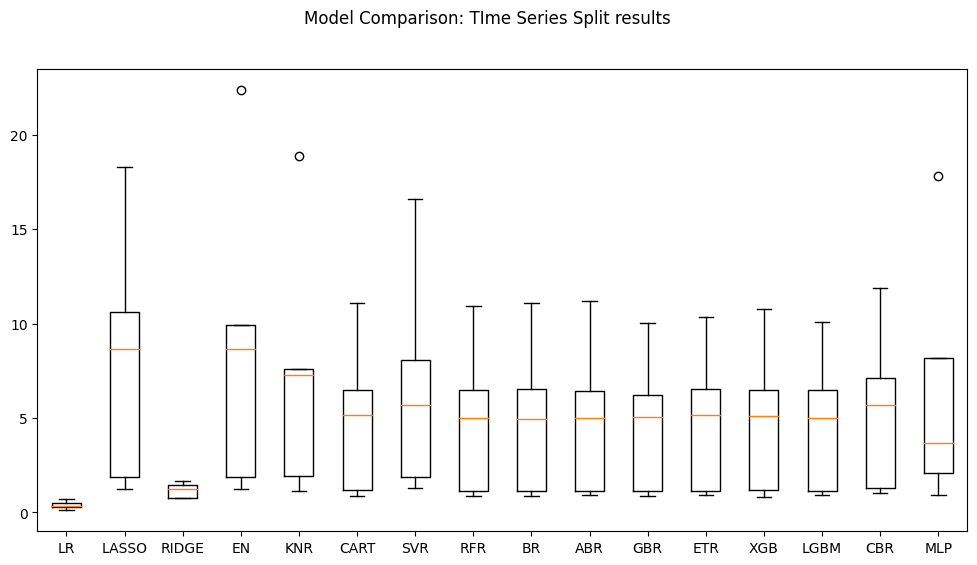

In [64]:
fig = plt.figure()
fig.suptitle('Model Comparison: TIme Series Split results')
ax = fig.add_subplot(111)
plt.boxplot(TS_split_results)
ax.set_xticklabels(model_names)
fig.set_size_inches(12, 6)
plt.show()

In [65]:
def plot_models_RMSE(model_names=model_names, train_results=train_results, test_results=test_results):
    fig = plt.figure()
    ind = np.arange(len(model_names))
    width = 0.1
    ax = fig.add_subplot(111)

    plt.bar(ind - width/2, train_results, width=width, label='Train Error')
    plt.bar(ind + width/2, test_results, width=width, label='Test Error')
    plt.legend()
    ax.set_xticks(ind)
    ax.set_xticklabels(model_names)
    plt.ylabel('Root Mean Square Error')
    fig.set_size_inches(12, 6)
    plt.show()

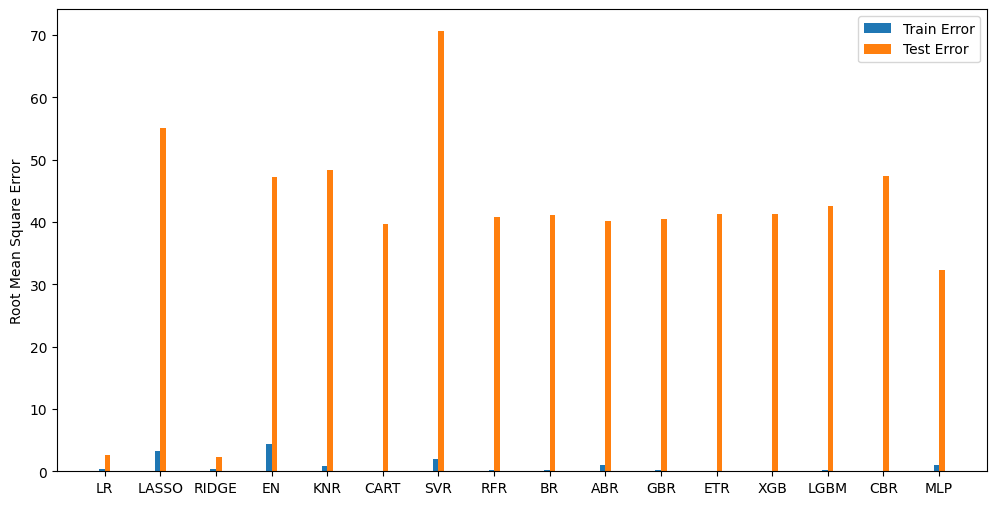

In [66]:
plot_models_RMSE()

# ARIMA

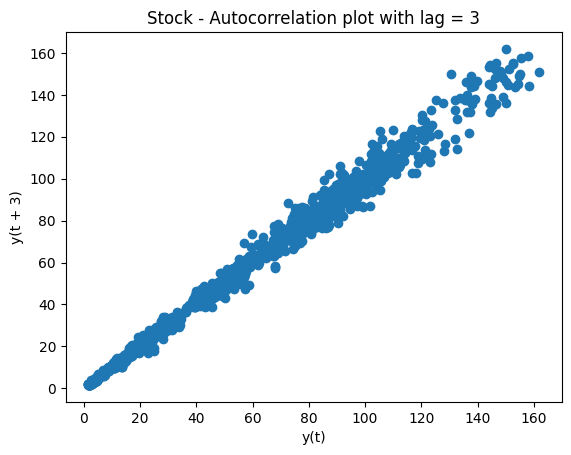

In [67]:
from pandas.plotting import lag_plot

plt.figure()
lag_plot(data['Close'], lag=3)
plt.title('Stock - Autocorrelation plot with lag = 3')
plt.show()

In [68]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import itertools

In [69]:
result = adfuller(y)
print(result,'\n')

print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("\nReject Ho - Time Series is Stationary")
else:
    print ("\nFailed to Reject Ho - Time Series is Non-Stationary")

(-0.8667437486606246, 0.7987268557243117, 26, 2441, {'1%': -3.433031765678395, '5%': -2.8627247772449245, '10%': -2.567400704939732}, 9708.78917913026) 

ADF Statistic: -0.8667437486606246
n_lags: 0.7987268557243117
p-value: 0.7987268557243117
Critial Values:
   1%, -3.433031765678395
Critial Values:
   5%, -2.8627247772449245
Critial Values:
   10%, -2.567400704939732
	1%: -3.433
	5%: -2.863
	10%: -2.567

Failed to Reject Ho - Time Series is Non-Stationary


#### ACF measures the average correlation between data points and their previous values for different lag lengths.
#### PACF is similar to ACF except that each partial correlation controls for any correlation between observations of a shorter lag length.

Text(0.5, 0, 'Lags')

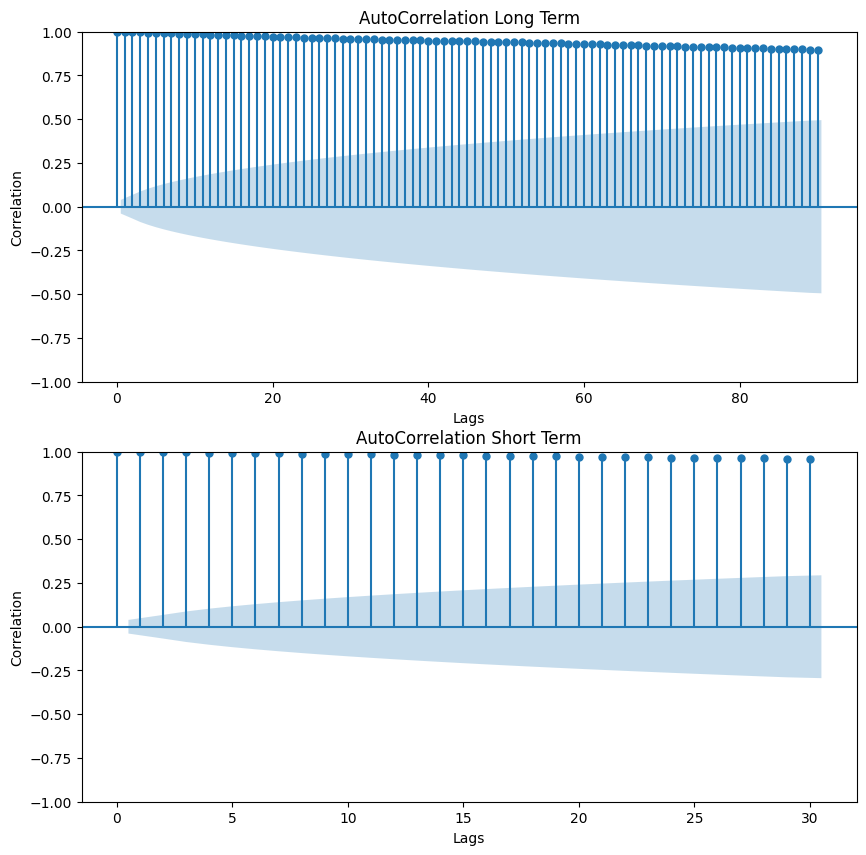

In [70]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))

acf = plot_acf(data['Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(data['Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')

ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

Text(0.5, 0, 'Lags')

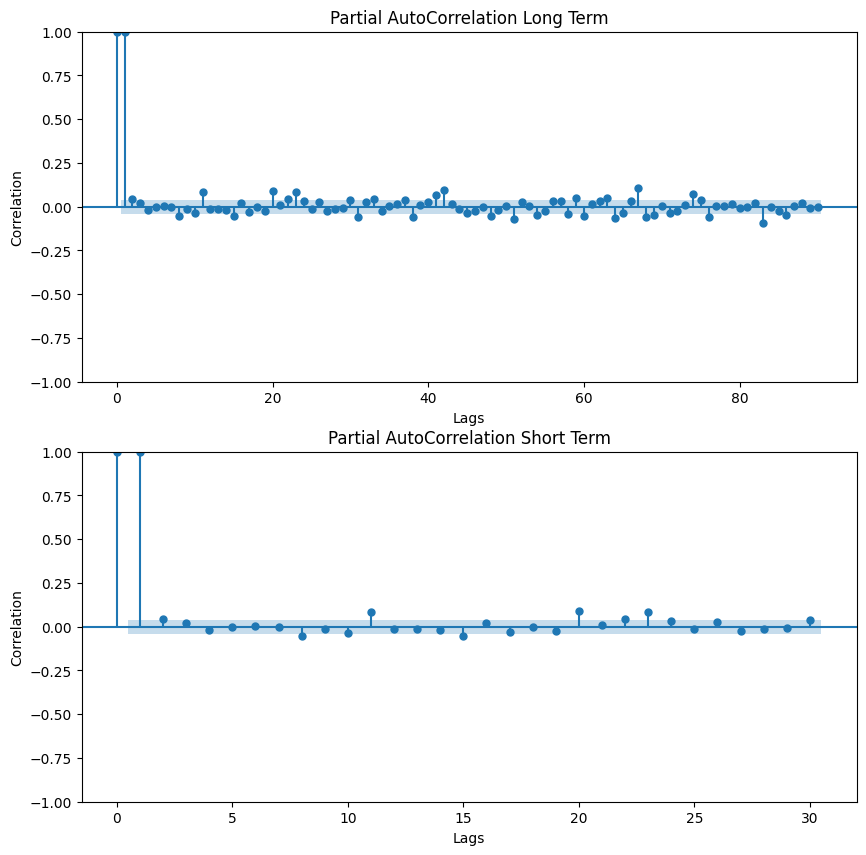

In [71]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))

pacf = plot_pacf(data['Close'],lags=90,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(data['Close'],lags=30,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')

ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

<Figure size 640x480 with 0 Axes>

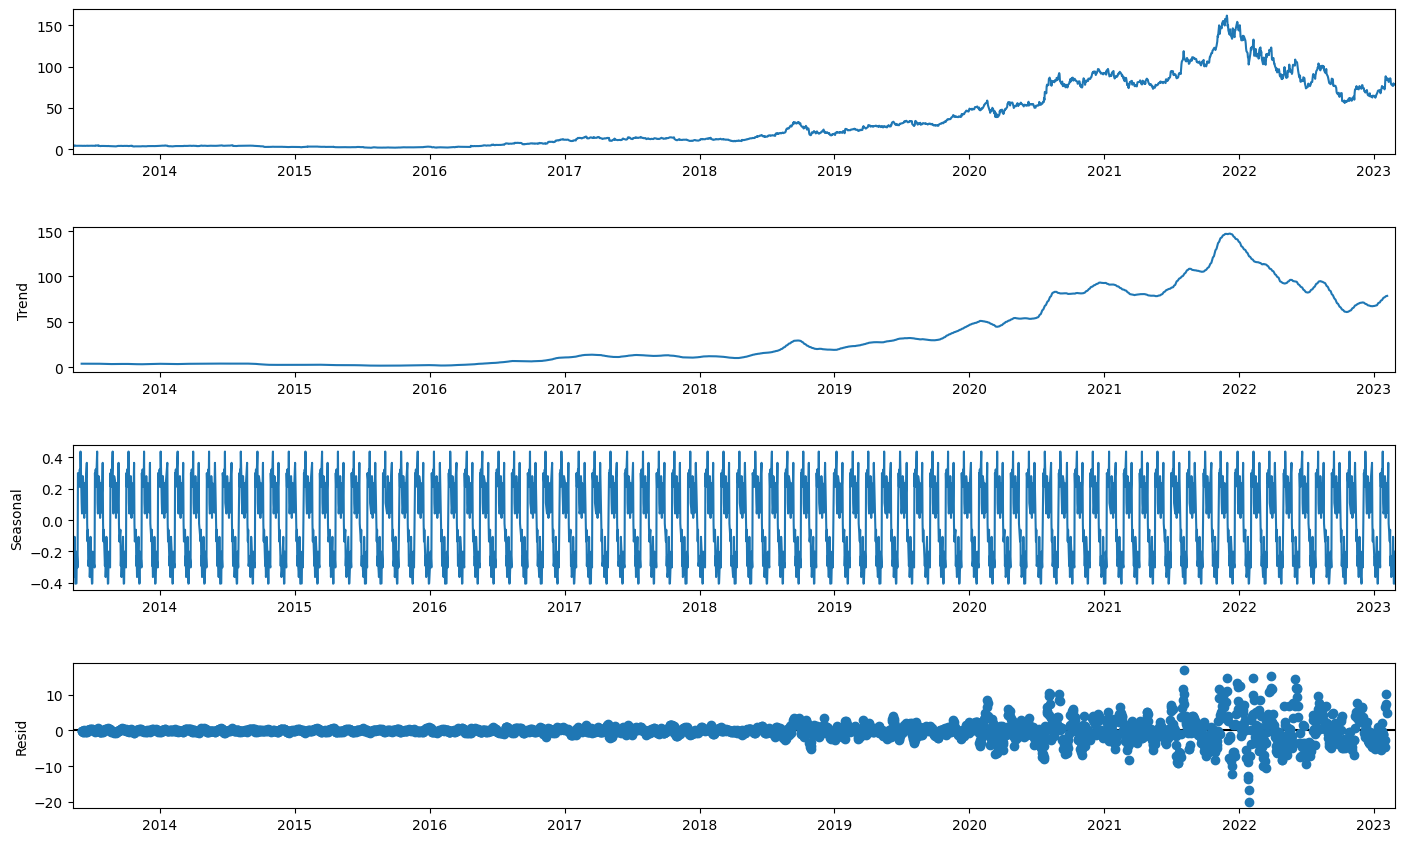

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(y, model='addictivee', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [73]:
p = d = q = range(3)
# p = d = range(3)
# q = range(5)
pdq = list(itertools.product(p, d, q))
print(len(pdq))
print(pdq)

27
[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2)]


In [74]:
import warnings
warnings.filterwarnings("ignore")

In [75]:
ARIMA_train_best, ARIMA_test_best, best_pdq = float("inf"), float("inf"), None

for param in pdq:
    arima = ARIMA(y_train, order=param).fit()
    ARIMA_train_results = mean_squared_error(y_train, arima.fittedvalues, squared=False)
    
    output = arima.predict(end=len(y_test)-1)
    ARIMA_test_results = mean_squared_error(y_test, output, squared=False)
    
    if ARIMA_test_results < ARIMA_test_best:
            ARIMA_train_best, ARIMA_test_best, best_pdq = ARIMA_train_results, ARIMA_test_results, param

    print(f'Model {param} | Train RMSE: {ARIMA_train_results :.5f} | Test RMSE: {ARIMA_test_results :.5f}')
print(f"\nBest ARIMA Model: {best_pdq} | Train RMSE: {ARIMA_train_best :.5f} | Test RMSE: {ARIMA_test_best :.5f}")

Model (0, 0, 0) | Train RMSE: 11.92925 | Test RMSE: 79.49635
Model (0, 0, 1) | Train RMSE: 6.17945 | Test RMSE: 83.80940
Model (0, 0, 2) | Train RMSE: 3.75411 | Test RMSE: 85.68081
Model (0, 1, 0) | Train RMSE: 0.65636 | Test RMSE: 88.27800
Model (0, 1, 1) | Train RMSE: 0.65247 | Test RMSE: 88.27772
Model (0, 1, 2) | Train RMSE: 0.64635 | Test RMSE: 88.27818
Model (0, 2, 0) | Train RMSE: 0.97899 | Test RMSE: 88.27949
Model (0, 2, 1) | Train RMSE: 0.65771 | Test RMSE: 88.27846
Model (0, 2, 2) | Train RMSE: 0.65378 | Test RMSE: 88.27850
Model (1, 0, 0) | Train RMSE: 0.67905 | Test RMSE: 88.27116
Model (1, 0, 1) | Train RMSE: 0.67750 | Test RMSE: 88.26507
Model (1, 0, 2) | Train RMSE: 0.66938 | Test RMSE: 88.27031
Model (1, 1, 0) | Train RMSE: 0.65141 | Test RMSE: 88.27769
Model (1, 1, 1) | Train RMSE: 0.64745 | Test RMSE: 88.27778
Model (1, 1, 2) | Train RMSE: 0.64413 | Test RMSE: 88.27811
Model (1, 2, 0) | Train RMSE: 0.76876 | Test RMSE: 88.27959
Model (1, 2, 1) | Train RMSE: 0.65271 |

In [76]:
ARIMA_train_best, ARIMA_test_best, best_pdq = float("inf"), float("inf"), None

for param in pdq:
    arima = ARIMA(y_train, order=param).fit()
    ARIMA_train_results = mean_squared_error(y_train, arima.fittedvalues, squared=False)
    
    output = arima.forecast(steps=len(y_test))
    ARIMA_test_results = mean_squared_error(y_test, output, squared=False)
    
    if ARIMA_test_results < ARIMA_test_best:
            ARIMA_train_best, ARIMA_test_best, best_pdq = ARIMA_train_results, ARIMA_test_results, param

    print(f'Model {param} | Train RMSE: {ARIMA_train_results :.5f} | Test RMSE: {ARIMA_test_results :.5f}')
print(f"\nBest ARIMA Model: {best_pdq} | Train RMSE: {ARIMA_train_best :.5f} | Test RMSE: {ARIMA_test_best :.5f}")

Model (0, 0, 0) | Train RMSE: 11.92925 | Test RMSE: 79.49635
Model (0, 0, 1) | Train RMSE: 6.17945 | Test RMSE: 79.48102
Model (0, 0, 2) | Train RMSE: 3.75411 | Test RMSE: 79.49196
Model (0, 1, 0) | Train RMSE: 0.65636 | Test RMSE: 53.77570
Model (0, 1, 1) | Train RMSE: 0.65247 | Test RMSE: 53.81573
Model (0, 1, 2) | Train RMSE: 0.64635 | Test RMSE: 54.01952
Model (0, 2, 0) | Train RMSE: 0.97899 | Test RMSE: 256.65005
Model (0, 2, 1) | Train RMSE: 0.65771 | Test RMSE: 45.75207
Model (0, 2, 2) | Train RMSE: 0.65378 | Test RMSE: 44.44167
Model (1, 0, 0) | Train RMSE: 0.67905 | Test RMSE: 54.43321
Model (1, 0, 1) | Train RMSE: 0.67750 | Test RMSE: 59.17173
Model (1, 0, 2) | Train RMSE: 0.66938 | Test RMSE: 55.83435
Model (1, 1, 0) | Train RMSE: 0.65141 | Test RMSE: 53.84486
Model (1, 1, 1) | Train RMSE: 0.64745 | Test RMSE: 54.03975
Model (1, 1, 2) | Train RMSE: 0.64413 | Test RMSE: 54.12338
Model (1, 2, 0) | Train RMSE: 0.76876 | Test RMSE: 316.61899
Model (1, 2, 1) | Train RMSE: 0.65271

In [77]:
train_results.append(ARIMA_train_best)
test_results.append(ARIMA_test_best)
model_names.append("ARIMA")

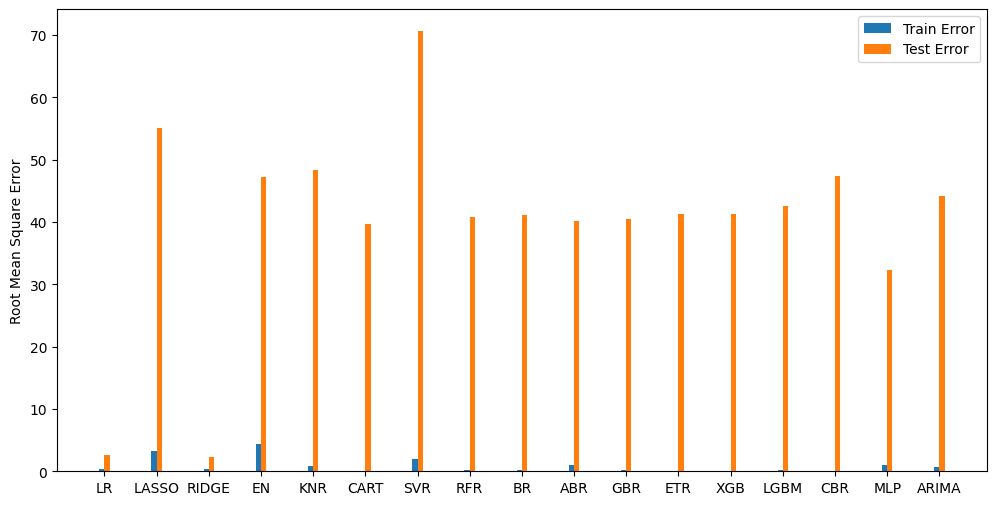

In [78]:
plot_models_RMSE()

#### It can be inferred from the graph above that ARIMA performs worse than ensemble learning methods.

In [79]:
model = ARIMA(y_train, order=best_pdq)
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1727
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1692.846
Date:                Tue, 28 Mar 2023   AIC                           3395.693
Time:                        18:19:10   BIC                           3422.958
Sample:                             0   HQIC                          3405.779
                               - 1727                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0910      0.031    -34.708      0.000      -1.153      -1.029
ar.L2         -0.1284      0.009    -13.593      0.000      -0.147      -0.110
ma.L1         -0.0328      0.028     -1.170      0.2

#### Alternatively, the most accurate ARIMA model can be configured below.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3411.354, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3386.229, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3392.016, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3411.121, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3355.824, Time=0.17 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3352.762, Time=0.22 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3349.637, Time=0.77 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3355.388, Time=0.40 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3308.302, Time=1.93 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3308.518, Time=1.55 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3312.058, Time=2.80 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3308.368, Time=1.75 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=3308.233, Time=0.82 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3308.604, Time=0.73 sec
 ARIMA(3,1,1)(0,0,0)[0]          

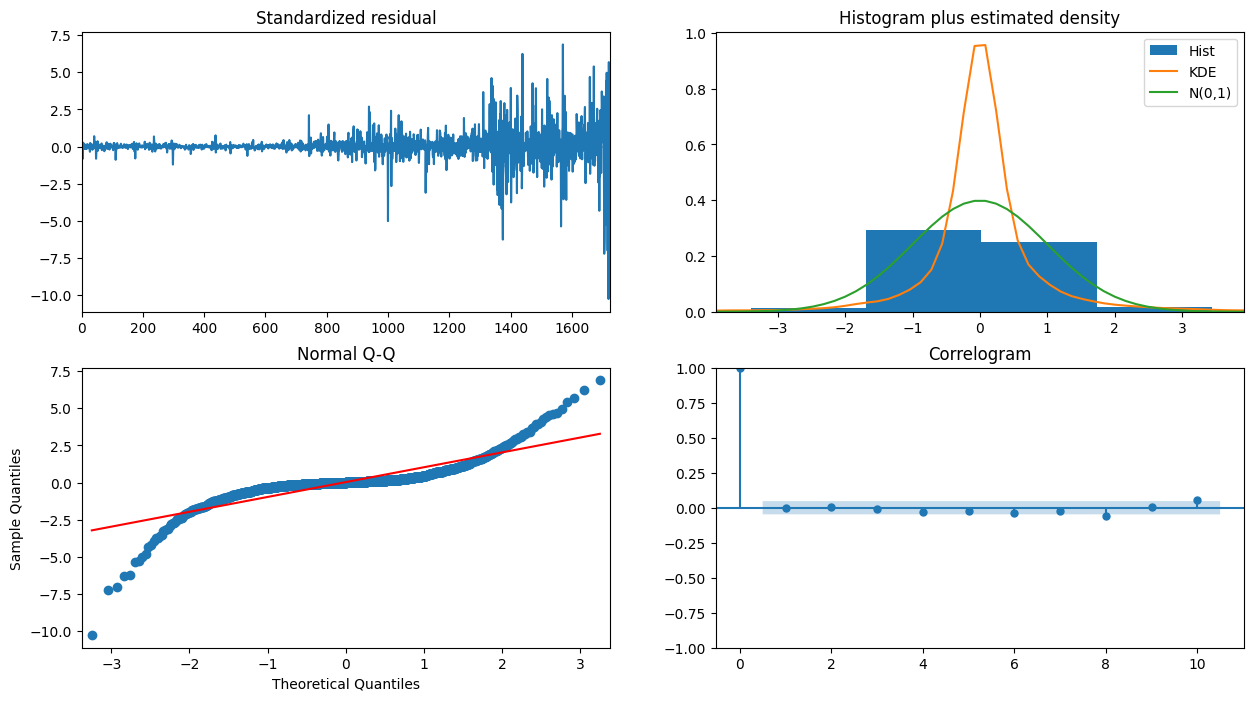

In [80]:
from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(y_train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

# PyTorch LSTM

In [81]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

In [82]:
scaler = MinMaxScaler()
ClosePrice = pd.DataFrame(data['Close'])

# Create training and testing datasets (70% train & 30% test)
train_split, test_split = train_test_split(ClosePrice, test_size=0.3, shuffle=False)
train = scaler.fit_transform(train_split)
test = scaler.fit_transform(test_split)

print(train.shape)
print(test.shape)

(1761, 1)
(756, 1)


#### For time series in LSTM, a "look back period" can be specified to predict the subsequent timestep value.

In [83]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print('trainX.shape = ',trainX.shape)
print('trainY.shape = ',trainY.shape)
print('testX.shape = ',testX.shape)
print('testY.shape = ',testY.shape)

trainX.shape =  (1750, 10)
trainY.shape =  (1750,)
testX.shape =  (745, 10)
testY.shape =  (745,)


#### The values to feed into the LSTM must be converted into tensors beforehand.

In [84]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
trainY = np.reshape(trainY, (trainY.shape[0], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
testY = np.reshape(testY, (testY.shape[0], 1))

# Convert data to PyTorch tensors
trainX = torch.from_numpy(trainX).float()
trainY = torch.from_numpy(trainY).float()
testX = torch.from_numpy(testX).float()
testY = torch.from_numpy(testY).float()

print('trainX.shape = ',trainX.shape)
print('trainY.shape = ',trainY.shape)
print('testX.shape = ',testX.shape)
print('testY.shape = ',testY.shape)

trainX.shape =  torch.Size([1750, 10, 1])
trainY.shape =  torch.Size([1750, 1])
testX.shape =  torch.Size([745, 10, 1])
testY.shape =  torch.Size([745, 1])


In [85]:
input_dim = 1 # The number of expected features in the input x (1 for univariate analysis)
hidden_dim = 50 # The number of features in the hidden state h
num_layers = 3 # Number of recurrent layers to formed a stacked LSTM
output_dim = 1
dropout_prob = 0.1
num_epochs = 100
learning_rate = 0.01

In [86]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout_prob):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout_prob) # bidirectional=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])
        return out

In [87]:
lstm_model = LSTM(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)

print("Model's state_dict:")
for param_tensor in lstm_model.state_dict():
    print(param_tensor, "\t", lstm_model.state_dict()[param_tensor].size())

Model's state_dict:
lstm.weight_ih_l0 	 torch.Size([200, 1])
lstm.weight_hh_l0 	 torch.Size([200, 50])
lstm.bias_ih_l0 	 torch.Size([200])
lstm.bias_hh_l0 	 torch.Size([200])
lstm.weight_ih_l1 	 torch.Size([200, 50])
lstm.weight_hh_l1 	 torch.Size([200, 50])
lstm.bias_ih_l1 	 torch.Size([200])
lstm.bias_hh_l1 	 torch.Size([200])
lstm.weight_ih_l2 	 torch.Size([200, 50])
lstm.weight_hh_l2 	 torch.Size([200, 50])
lstm.bias_ih_l2 	 torch.Size([200])
lstm.bias_hh_l2 	 torch.Size([200])
fc.weight 	 torch.Size([1, 50])
fc.bias 	 torch.Size([1])


#### Training the LSTM Model

In [88]:
lstm_model = LSTM(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=learning_rate)
hist = np.zeros(num_epochs)

for epoch in range(1, num_epochs+1):
    
    lstm_model.train()
    
    trainY_pred = lstm_model(trainX)
    loss = torch.sqrt(criterion(trainY_pred, trainY))
    hist[epoch-1] = loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}/{num_epochs}, Loss: {loss.item():.4f}")

Epoch: 10/100, Loss: 0.1935
Epoch: 20/100, Loss: 0.0730
Epoch: 30/100, Loss: 0.0456
Epoch: 40/100, Loss: 0.0300
Epoch: 50/100, Loss: 0.0321
Epoch: 60/100, Loss: 0.0242
Epoch: 70/100, Loss: 0.0218
Epoch: 80/100, Loss: 0.0219
Epoch: 90/100, Loss: 0.0208
Epoch: 100/100, Loss: 0.0201


In [89]:
train_actual = pd.DataFrame(scaler.inverse_transform(trainY.detach().numpy()))
print(train_actual.head())
train_pred = pd.DataFrame(scaler.inverse_transform(trainY_pred.detach().numpy()))
print(train_pred.head())

LSTM_train_RMSE = mean_squared_error(train_pred, train_actual, squared=False)
print()
print('LSTM Train RMSE:',LSTM_train_RMSE)

      0
0 40.82
1 40.93
2 40.97
3 41.14
4 40.90
      0
0 40.58
1 40.99
2 39.91
3 39.33
4 40.60

LSTM Train RMSE: 2.481959


#### Plotting the error loss of all epochs

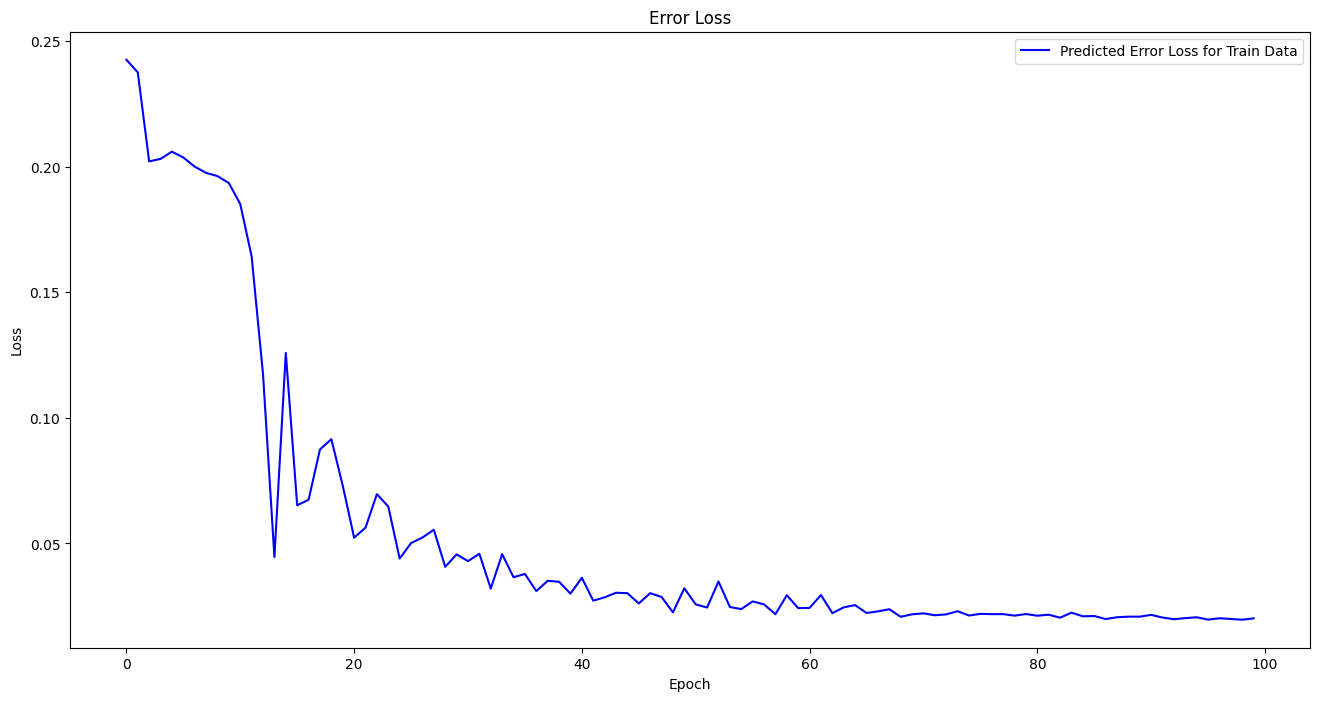

In [90]:
epochs = np.arange(num_epochs)
plt.figure(figsize=(16,8))
plt.plot(epochs, hist, color = 'blue', label = 'Predicted Error Loss for Train Data')
plt.title('Error Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Plotting the actual and predicted Close Price in the training phase
Accuracy can be improved by tuning the "look back period" specified earlier.

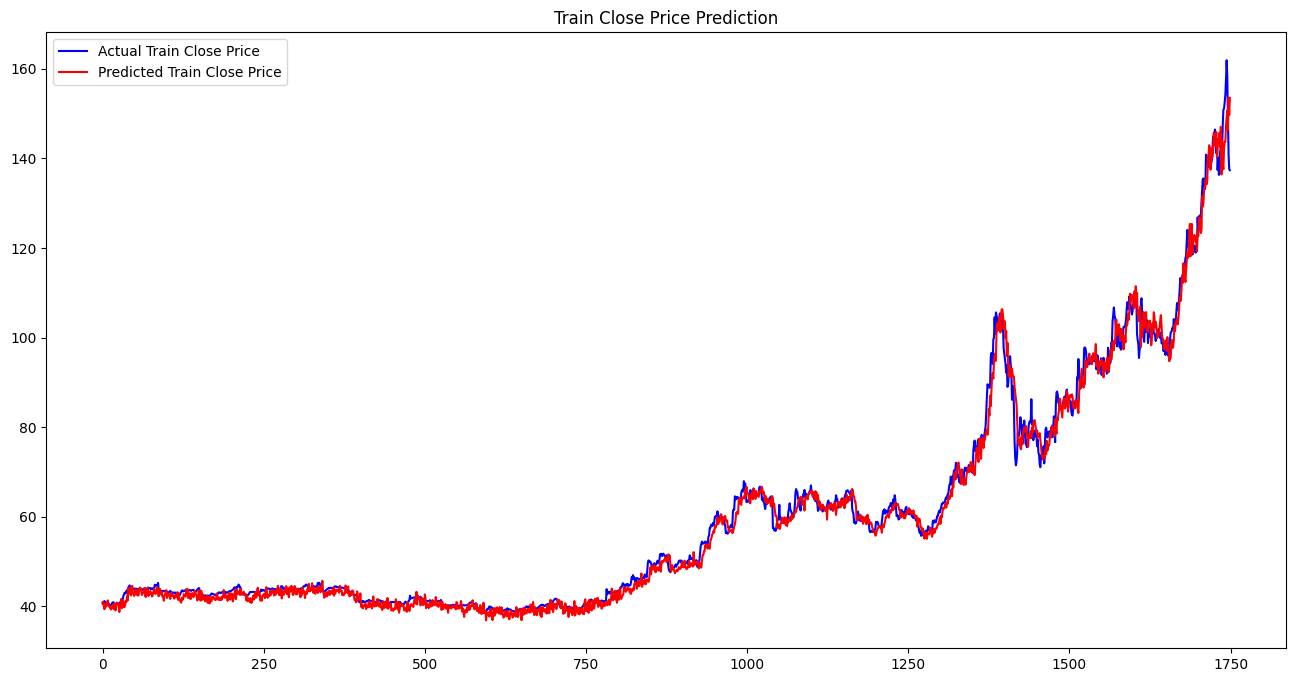

In [91]:
plt.figure(figsize=(16,8))
plt.plot(train_actual, color = 'blue', label = 'Actual Train Close Price')
plt.plot(train_pred, color = 'red', label = 'Predicted Train Close Price')
plt.title('Train Close Price Prediction')
plt.legend()
plt.show()

#### Evaluating the LSTM Model on the testing phase

In [92]:
lstm_model.eval()

testY_pred = lstm_model(testX)

test_actual = pd.DataFrame(scaler.inverse_transform(testY.detach().numpy()))
print(test_actual.head())
test_pred = pd.DataFrame(scaler.inverse_transform(testY_pred.detach().numpy()))
print(test_pred.head())

LSTM_test_RMSE = mean_squared_error(test_pred, test_actual, squared=False)
print()
print(LSTM_train_RMSE)

      0
0 43.90
1 38.71
2 41.88
3 39.12
4 39.82
      0
0 46.89
1 46.26
2 45.36
3 44.54
4 43.59

2.481959


#### Save the trained model’s learned parameters using the code in the below cell.
It is recommended to save the model's trained parameters instead of the whole model.

In [93]:
save_model_name = "predict_stock_price_lstm_pytorch"
torch.save(lstm_model.state_dict(), save_model_name)

#### Plotting the actual and predicted Close Price in the training phase

Accuracy can be improved by tuning the layers in the LSTM Model.

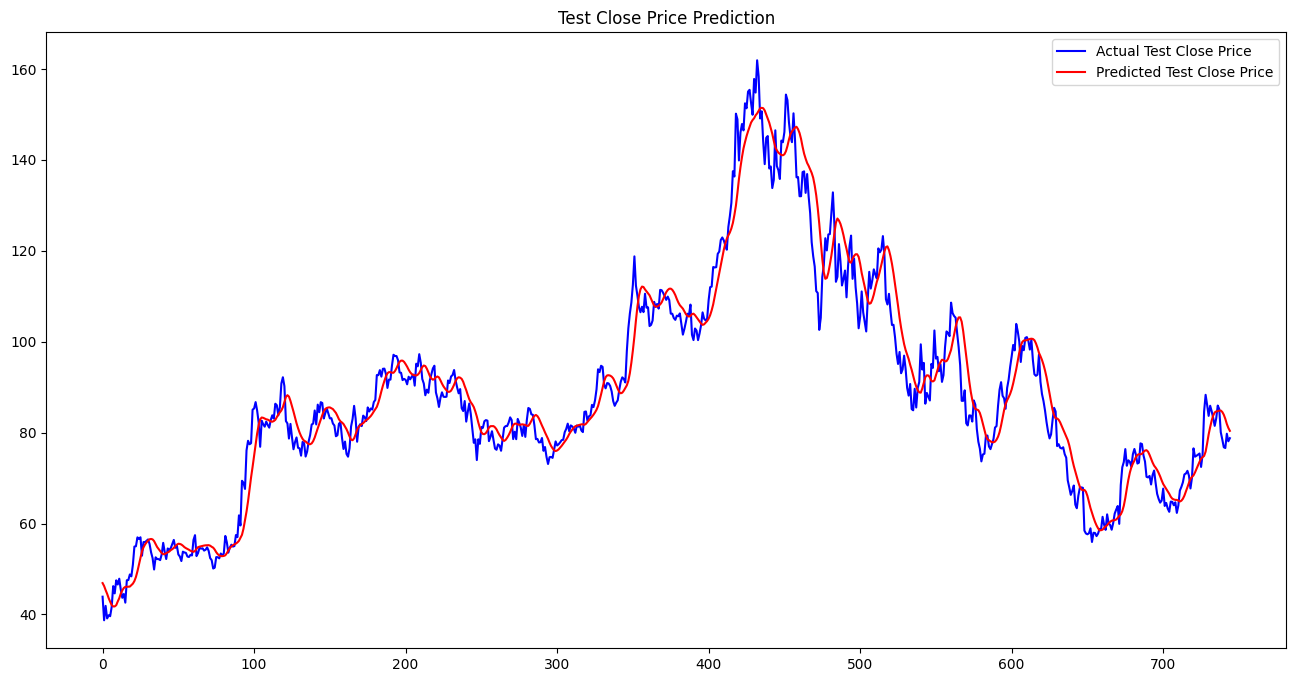

In [94]:
plt.figure(figsize=(16,8))
plt.plot(test_actual, color = 'blue', label = 'Actual Test Close Price')
plt.plot(test_pred, color = 'red', label = 'Predicted Test Close Price')
plt.title('Test Close Price Prediction')
plt.legend()
plt.show()

In [95]:
train_results.append(LSTM_train_RMSE)
test_results.append(LSTM_test_RMSE)
model_names.append("LSTM")

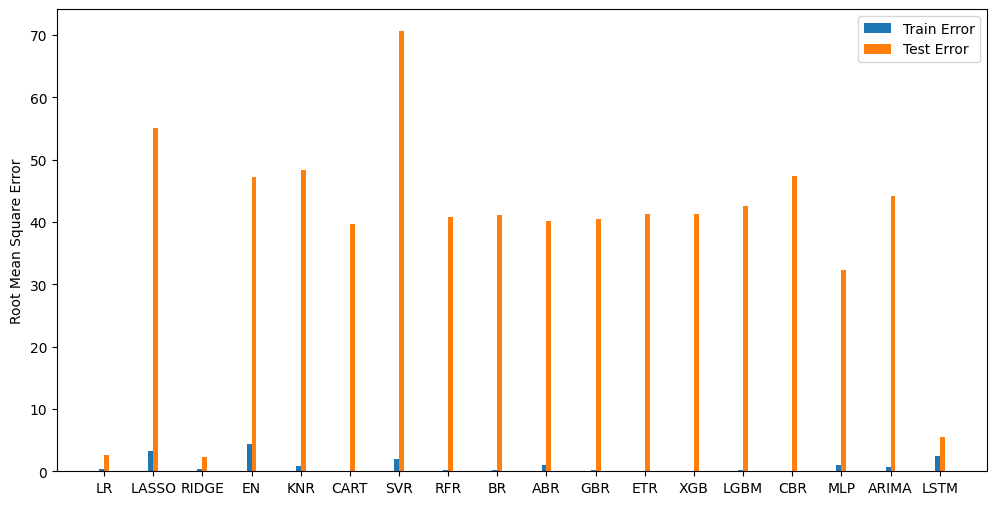

In [96]:
plot_models_RMSE()

#### From the graph above, it can be inferred that LSTM far outperform MLP and ARIMA.